In [1]:
%pylab inline

from matplotlib.colors import ListedColormap
from sklearn import linear_model, model_selection, datasets, metrics
import numpy as np 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we ll use blob dataset - blob means 'капля' in rus so scatter plots look like blobs

In [3]:
blobs = datasets.make_blobs(n_features=2, centers=2, cluster_std=5.5, random_state=1)

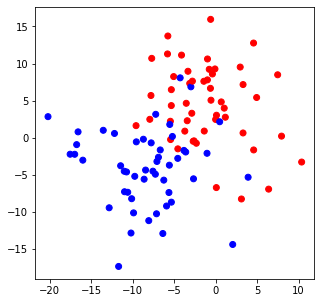

In [4]:
colors = ListedColormap(['red', 'blue'])

pyplot.figure(figsize(5, 5))
pyplot.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda y: y[1], blobs[0])), c=blobs[1], cmap=colors)

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], test_size=0.3, random_state=1)

In [6]:
# ridge - гребневая классификация (вроде как просто с регуляризцией)

ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [7]:
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(random_state=1)

In [8]:
ridge_predictions = ridge_classifier.predict(test_data)

In [9]:
print(ridge_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [10]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [11]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [12]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [13]:
ridge_classifier.intercept_ # коэффициент перед своб членом

array([-0.31250723])

In [14]:
metrics.precision_score(test_labels, ridge_predictions)

0.75

In [15]:
metrics.recall_score(test_labels, ridge_predictions)

1.0

In [16]:
metrics.roc_auc_score(test_labels, ridge_predictions)

0.8888888888888888

In [17]:
logistic_regression = linear_model.LogisticRegression(random_state=1)


In [18]:
logistic_regression.fit(train_data, train_labels)

LogisticRegression(random_state=1)

In [19]:
logistic_regression.coef_

array([[-0.42738572, -0.3117454 ]])

In [20]:
logistic_regression.intercept_

array([-1.27059303])

In [21]:
lr_preds = logistic_regression.predict(test_data)

In [22]:
lr_preds

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [23]:
test_labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [24]:
# we can also get probabilities of each prediction

lr_proba_pred = logistic_regression.predict_proba(test_data)

In [25]:
lr_proba_pred

array([[9.99254667e-01, 7.45333217e-04],
       [4.08279523e-01, 5.91720477e-01],
       [4.90541791e-01, 5.09458209e-01],
       [3.78296027e-03, 9.96217040e-01],
       [7.32221196e-01, 2.67778804e-01],
       [2.44262899e-01, 7.55737101e-01],
       [9.93761113e-01, 6.23888724e-03],
       [9.78405579e-01, 2.15944205e-02],
       [9.55344987e-01, 4.46550128e-02],
       [1.68318566e-01, 8.31681434e-01],
       [9.20548027e-01, 7.94519726e-02],
       [8.49635842e-03, 9.91503642e-01],
       [8.42172474e-01, 1.57827526e-01],
       [4.78103481e-02, 9.52189652e-01],
       [4.16878377e-03, 9.95831216e-01],
       [7.76668489e-04, 9.99223332e-01],
       [2.05937909e-01, 7.94062091e-01],
       [9.31195721e-01, 6.88042793e-02],
       [2.41180236e-01, 7.58819764e-01],
       [8.27655095e-04, 9.99172345e-01],
       [8.91142562e-02, 9.10885744e-01],
       [9.95944524e-01, 4.05547579e-03],
       [9.84077857e-01, 1.59221428e-02],
       [3.02681109e-01, 6.97318891e-01],
       [1.474405

In [26]:
metrics.accuracy_score(test_labels, lr_preds)

0.8

In [27]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [28]:
metrics.roc_auc_score(test_labels, lr_preds)

0.8333333333333334

In [29]:
metrics.roc_auc_score(test_labels, ridge_predictions)

0.8888888888888888

In [30]:
# now lets use CV - we can just call for ONE CARL ONE method cross_cal_score

ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring='accuracy', cv=10)
lr_scoring = model_selection.cross_val_score(logistic_regression, blobs[0], blobs[1], scoring='accuracy', cv=10)


In [31]:
print(f"""Ridge 
    mean: {ridge_scoring.mean()}
    min: {ridge_scoring.min()}
    max: {ridge_scoring.max()}
    std: {ridge_scoring.std()}""")

Ridge 
    mean: 0.8800000000000001
    min: 0.7
    max: 1.0
    std: 0.08717797887081348


In [32]:
print(f"""LogReg
    mean: {lr_scoring.mean()}
    min: {lr_scoring.min()}
    max: {lr_scoring.max()}
    std: {lr_scoring.std()}""")

LogReg
    mean: 0.8800000000000001
    min: 0.7
    max: 1.0
    std: 0.08717797887081348


In [38]:
# set our own scorer and cv_strategy

scorer = metrics.make_scorer(metrics.precision_score)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=2)

ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)
lr_scoring = model_selection.cross_val_score(logistic_regression, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [39]:
print(f"""Ridge 
    mean: {ridge_scoring.mean()}
    min: {ridge_scoring.min()}
    max: {ridge_scoring.max()}
    std: {ridge_scoring.std()}""")

Ridge 
    mean: 0.8968737879767292
    min: 0.7857142857142857
    max: 1.0
    std: 0.06508015494660803


In [40]:
print(f"""LogReg
    mean: {lr_scoring.mean()}
    min: {lr_scoring.min()}
    max: {lr_scoring.max()}
    std: {lr_scoring.std()}""")

LogReg
    mean: 0.894824301515478
    min: 0.7777777777777778
    max: 1.0
    std: 0.068466613620841
